In [ ]:
import numpy as np

In [ ]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

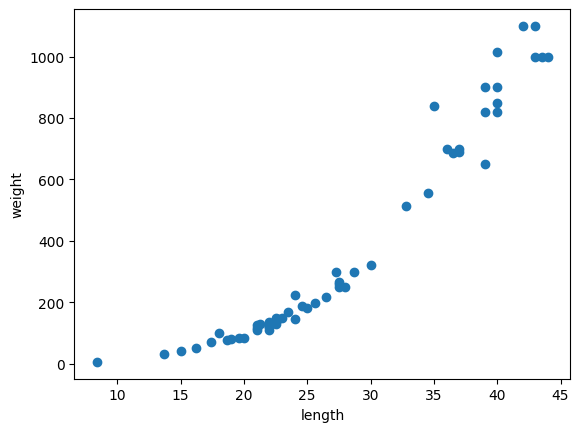

In [ ]:
import matplotlib.pyplot as plt # 산점도
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

-> 농어의 길이가 증가하면서 무게도 증가

In [ ]:
# 훈련 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
# 1차원 배열 -> 2차원 배열
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
# (4,) 배열이므로 (2, 2)로 변경
test_array = test_array.reshape(2, 2) # reshape()로 크기 변경
print(test_array.shape)

(2, 2)


(4,) 크기의 배열을 (2,3)으로 바꿀 시 에러 발생 (원본 배열의 원소 = 4개 but 2 * 3으로 바꾸려고 하기 때문)

In [ ]:
# -1 = 나머지 원소 개수로 모두 채워라
train_input = train_input.reshape(-1, 1) # 첫 번째 크기를 나머지 원소 개수로, 두 번째 크기를 1로
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
# 결정계수
print(knr.score(test_input, test_target)) # score() 메서드가 출력하는 값은 높을수록 좋은 것

0.992809406101064


1의 가까울수록 좋은 값 (예측에 타깃에 가까워진 것)

In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_predictions = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_predictions)
print(mae)

19.157142857142862


예측이 평균적으로 19g 타깃값과 차이

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


**과대적합:** 테스트 세트에 비해 훈련 세트의 점수가 높을 경우 (훈련 세트에서 점수가 좋았는데 테스트 세트에서 나쁠 경우, 훈련 세트에만 잘 맞는 모델)

**과소적합:** 테스트 세트에 비해 훈련 세트의 점수가 낮거나 두 점수가 모두 낮은 경우 (모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우)

In [ ]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) # 훈련 세트

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target)) # 테스트 세트

0.9746459963987609


테스트 세트의 점수가 훈련 세트보다 낮아졌으므로 과소 적합 문제 해결

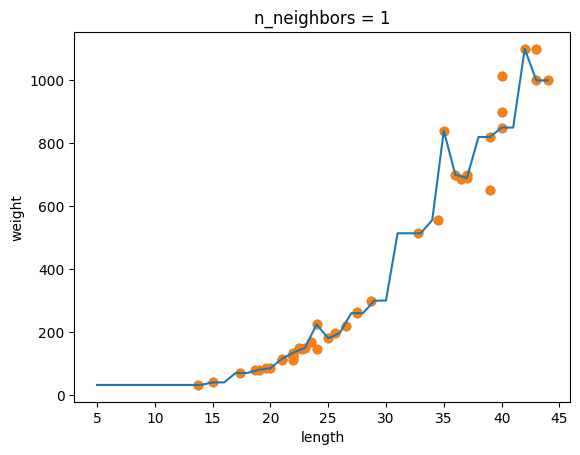

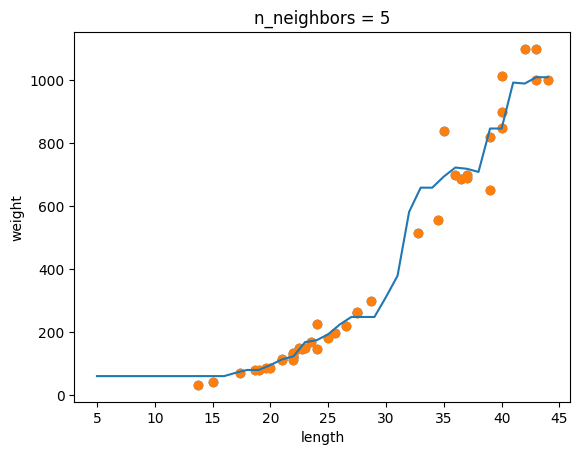

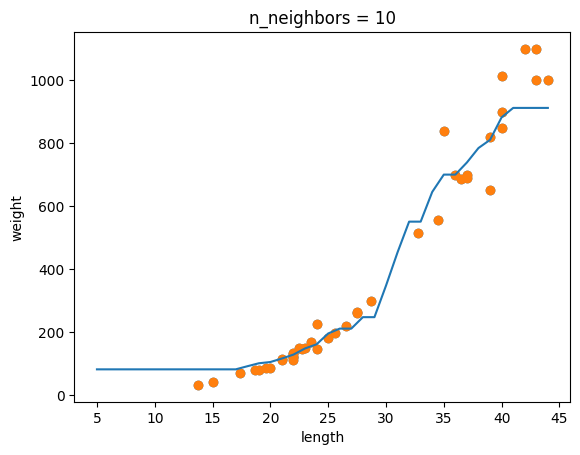

In [17]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

# 5 ~ 45까지 x 좌표 생성
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과 그래프 생성
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    # 지정한 범위 x에 대한 예측
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target)

    # 훈련 세트와 예측 결과 그래프 생성
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()